In [1]:
import numpy as np 
import pylab as pl 
import pandas as pd 
import glob
import os
import seaborn as sns
%matplotlib inline 

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette(sns.color_palette("husl"))

In [3]:
path = "results/"                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,sep = '\t') for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df.sort_values('target_class')

,Unnamed: 0,background_estimate,dataset_id,decay_fit_pars,decay_reduced_chi_sq,decay_slope,decay_slope_err,fall_idx,peak_flux,peak_idx,rise_fit_pars,rise_idx,rise_reduced_chi_sq,rise_slope,rise_slope_err,target_class,trigger_idx
10658,0,0.000000,PKS2004-447_11,NaN,NaN,NaN,NaN,999.0,0.557797,999.0,"[0.017007456351867137, -2.084619270085653]",0.0,inf,0.017007,0.000072,AGN,0.0
8834,1,0.124347,NGC7213_16,"[-0.008784272584250874, 37.77188589314712]",inf,-0.008784,0.000612,931.0,0.144648,851.0,"[0.0016041155406267638, -11.910522300123084]",667.0,inf,0.001604,0.000255,AGN,668.0
8833,0,0.124347,NGC7213_16,"[-0.02030814935871604, 86.00190001797047]",inf,-0.020308,0.000746,582.0,0.157472,518.0,"[0.036156308060800196, -161.98045483409334]",475.0,inf,0.036156,0.001432,AGN,476.0
6431,0,0.121456,NGC7213_9,"[-0.007358514717517794, 28.990454761848117]",inf,-0.007359,0.000435,681.0,0.132333,669.0,"[0.010646993672085091, -52.978587416165546]",661.0,inf,0.010647,0.001103,AGN,662.0
6432,1,0.121456,NGC7213_9,"[-0.013750253503293555, 59.91869012674467]",inf,-0.013750,0.000691,795.0,0.140577,748.0,"[0.011324950697232702, -56.44168072633553]",693.0,inf,0.011325,0.000277,AGN,694.0
1479,0,0.000000,PKS2004-447,"[-0.020289429185098132, 1.1553729320004427]",0.711867,-0.020289,0.017807,19.0,0.605085,15.0,"[0.017770225345011183, -2.1184497553178785]",0.0,0.557239,0.017770,0.003133,AGN,0.0
6433,2,0.121456,NGC7213_9,"[-0.007933027129867092, 33.968318927353096]",inf,-0.007933,0.000427,931.0,0.147633,852.0,"[0.021911316466838915, -107.51583181777723]",806.0,inf,0.021911,0.000313,AGN,807.0
1476,0,0.125134,NGC7213_12,"[-0.009254536941699176, 40.034592646657835]",inf,-0.009255,0.000829,940.0,0.146788,856.0,"[0.0021117917974483244, -14.189728285257365]",671.0,inf,0.002112,0.000252,AGN,672.0
5033,0,0.000000,PKS2004-447_15,NaN,NaN,NaN,NaN,999.0,0.543198,999.0,"[0.015618770142589325, -1.9417557668596424]",0.0,inf,0.015619,0.000075,AGN,0.0
7260,0,-0.014767,NGC4278_17,"[-0.0017458480479440922, 17.120501131473958]",inf,-0.001746,0.000064,892.0,0.367147,799.0,"[0.0017721805462287668, -18.678111970828365]",709.0,inf,0.001772,0.000065,AGN,710.0


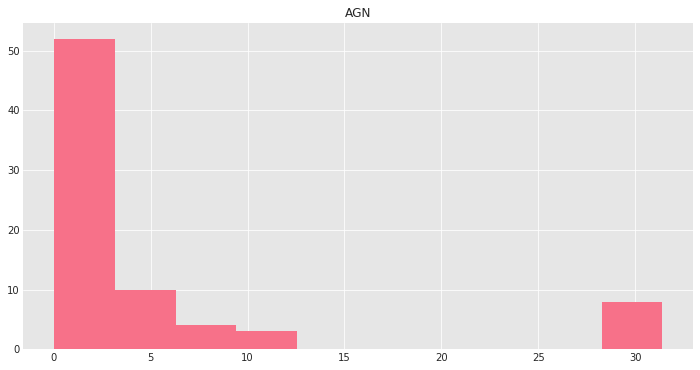

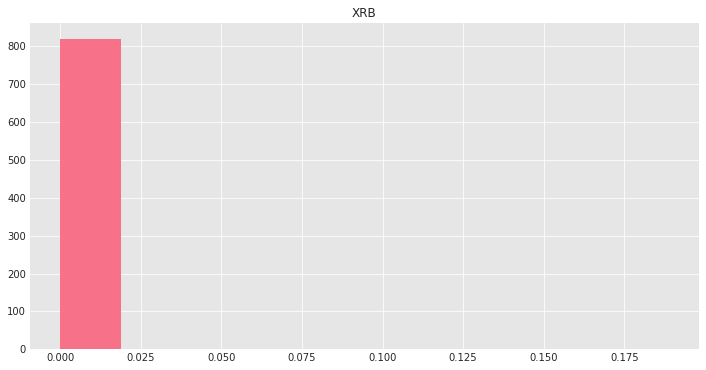

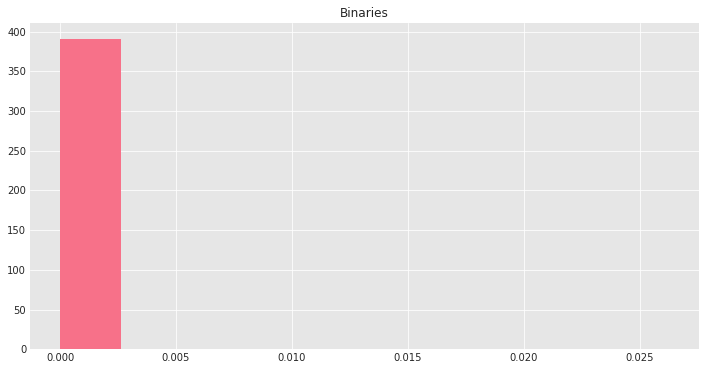

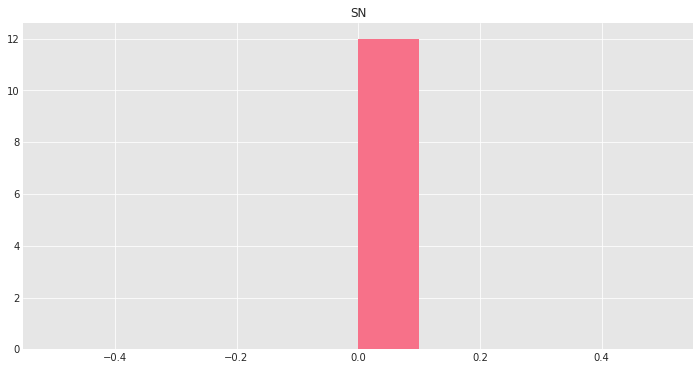

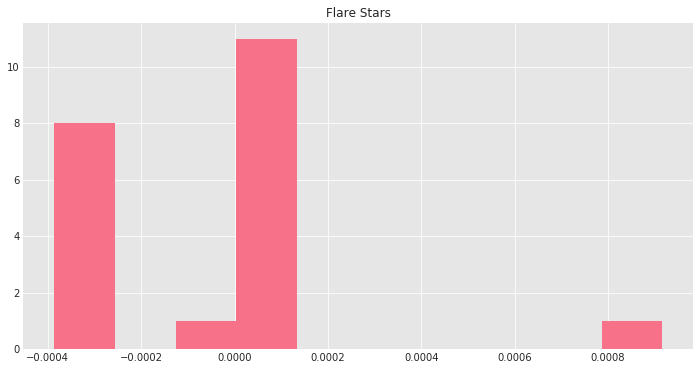

In [24]:
background_agn = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" )   , "background_estimate"]
background_xrb = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" ) , "background_estimate"]
background_bin = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')   , "background_estimate"]
background_sn = df.loc[(df["target_class"] == "SN" ) , "background_estimate"]
background_fs = df.loc[(df["target_class"] == "Flare_Stars" )   , "background_estimate"]

pl.figure(figsize=(12,6))
pl.hist(background_agn)
pl.title('AGN')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_xrb)
pl.title('XRB')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_bin)
pl.title('Binaries')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_sn)
pl.title('SN')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_fs)
pl.title('Flare Stars')
pl.show()


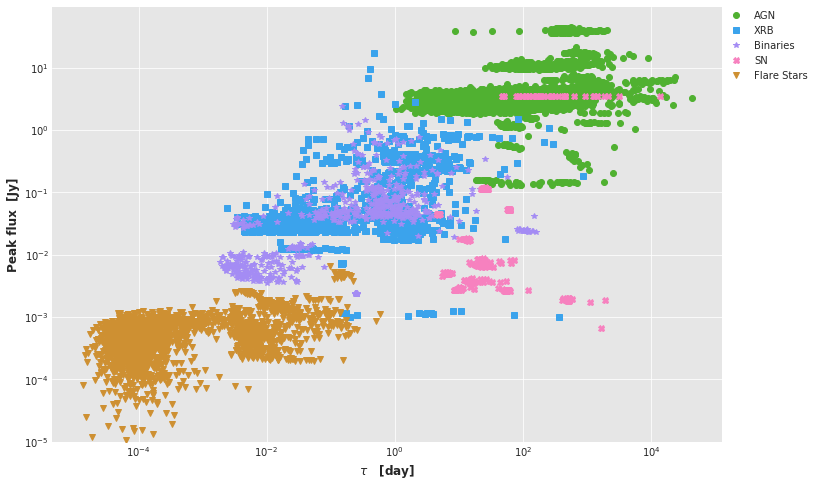

In [4]:
classes = df.target_class.unique()
#markers = ["o","v","^",">","1","3","8","s","p","P","*","h","X","<","2","4","H"]
markers = ["v","^",">","1","3","8","p","P","h","X","<","2","4","H"]
blue = (0.23299120924703914, 0.63958655206603499, 0.92607060939777441)
green = (0.31268900195043292, 0.6928754610296064, 0.19237048303303789)
purple = (0.64230443492197387, 0.54976800512564672, 0.9582651433656727)
pink = (0.96862745098039216, 0.50588235294117656, 0.74901960784313737)
orange = (0.8087954113106306, 0.56347000500566935, 0.19502642696727285)

rise_slope_agn = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" )   , "rise_slope"]
peak_flux_agn  = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" ) , "peak_flux"]

rise_slope_xrb = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" ) , "rise_slope"]
peak_flux_xrb  = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" )  , "peak_flux"]

rise_slope_bin = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')   , "rise_slope"]
peak_flux_bin  = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')  , "peak_flux"]

rise_slope_sn = df.loc[(df["target_class"] == "SN" ) , "rise_slope"]
peak_flux_sn  = df.loc[(df["target_class"] == "SN" ) , "peak_flux"]

rise_slope_fs = df.loc[(df["target_class"] == "Flare_Stars" )   , "rise_slope"]
peak_flux_fs  = df.loc[(df["target_class"] == "Flare_Stars" )  , "peak_flux"]

        
pl.figure(figsize = [12,8])
pl.plot(1/rise_slope_agn,peak_flux_agn,marker = "o",linestyle = "",color= green ,label = "AGN")
pl.plot(1/rise_slope_xrb,peak_flux_xrb,marker = "s",linestyle = "",color= blue,label = "XRB")
pl.plot(1/rise_slope_bin,peak_flux_bin,marker = "*",linestyle = "",color= purple,label = "Binaries")
pl.plot(1/rise_slope_sn,peak_flux_sn,marker = "X",linestyle = "",color= pink,label = "SN")
pl.plot(1/rise_slope_fs,peak_flux_fs,marker = "v",linestyle = "",color= orange,label = "Flare Stars")

pl.xlabel(r'$\tau$   [day]',fontsize=12,fontweight='bold')
pl.ylabel("Peak flux  [Jy]",fontsize=12,fontweight='bold')
pl.xscale("log")
pl.yscale("log")
lgd = pl.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pl.ylim(ymin = 1e-5)
pl.savefig('fluxVstau.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
pl.show()



In [13]:
df.loc[(df["target_class"] == "SN" )]

,Unnamed: 0,background_estimate,dataset_id,decay_fit_pars,decay_reduced_chi_sq,decay_slope,decay_slope_err,fall_idx,peak_flux,peak_idx,rise_fit_pars,rise_idx,rise_reduced_chi_sq,rise_slope,rise_slope_err,target_class,trigger_idx
1,0,0.000000,SN2008ax_9,"[-0.011907855413823665, -5.614050639314252]",inf,-0.011908,4.060141e-04,999.0,0.003804,96.0,"[0.07589025870323712, -6.609398340960809]",0.0,inf,0.075890,0.001779,SN,0.0
291,0,0.000000,SN1998bw_4,"[-0.022230401831703113, -2.9440251395718966]",inf,-0.022230,4.347477e-04,999.0,0.044223,161.0,"[0.22104258200879623, -5.505795973547708]",0.0,inf,0.221043,0.002742,SN,0.0
292,0,0.000000,SN1988z_3,"[-0.00016361465620186723, -6.121718332702492]",inf,-0.000164,3.718398e-06,999.0,0.001830,459.0,"[0.002044560479086, -8.63334527919349]",0.0,inf,0.002045,0.000020,SN,0.0
299,0,0.000000,SN2004gq_3,"[-0.005636407458517506, -5.695203117810318]",inf,-0.005636,3.057983e-04,999.0,0.006397,60.0,"[0.045025668675873126, -6.22146530556929]",0.0,inf,0.045026,0.003560,SN,0.0
300,0,0.000000,SN2008ax_3,"[-0.011137545591622944, -5.6288394999963645]",inf,-0.011138,4.257064e-04,999.0,0.003933,85.0,"[0.08361895845443276, -6.622631325726389]",0.0,inf,0.083619,0.002046,SN,0.0
404,0,0.000000,SN2003bg_5,"[-0.0026041181994058463, -2.70565309399726]",inf,-0.002604,2.918718e-05,999.0,0.053377,134.0,"[0.01654044474755655, -5.098555592792541]",0.0,inf,0.016540,0.000653,SN,0.0
409,0,0.000000,SN1993J_0,"[-0.00039942769707901983, -2.894749280217252]",inf,-0.000399,1.624181e-05,999.0,0.115702,25.0,"[0.041860265040772726, -6.6925729802590235]",0.0,inf,0.041860,0.004564,SN,0.0
513,0,0.000000,SN2011dh_2,"[-0.007803622595141482, -4.477696522039507]",inf,-0.007804,1.634882e-04,999.0,0.007501,394.0,"[0.03233929521483474, -6.193943442968606]",0.0,inf,0.032339,0.000560,SN,0.0
515,0,0.000000,SN2004gq_4,"[-0.0023992383398653856, -6.123432549207604]",inf,-0.002399,3.075541e-04,999.0,0.006508,62.0,"[0.03438642256329646, -6.040209113796677]",0.0,inf,0.034386,0.004023,SN,0.0
530,0,0.000000,SN2003bg_2,"[-0.002471823455406429, -2.781938986839483]",inf,-0.002472,2.661938e-05,999.0,0.053525,132.0,"[0.016715624147831, -5.10552341782157]",0.0,inf,0.016716,0.000680,SN,0.0


In [5]:
df['target_class'].value_counts()

Flare_Stars      931
BLAZAR           519
BHXRB            392
NSXRB            303
SN               252
XRB              235
Algol            229
RSCVn            176
Nova             147
magCV             75
GRB               74
AGN               50
TDE               42
ULX               21
DN                21
BinaryPulsars     21
Magnetar          21
Name: target_class, dtype: int64

In [41]:
209+176+6

391

* Algol: Eclisping binaries - one main sequence, one not. 
* RSCVn: RS Canum Venaticorum variable - type of binary - close binary stars with active chromospheres 
* magCV: Cataclysmic variable binary star system
* Flare star: variable star due to something analogous to solar flares. 

Types: 
- XRB           - 821
- Non XRB       - 391
- AGN           - 77
- Flare Stars   - 21
- SN            - 12

In [39]:
b = 1.0
c = [1.0]
a = np.resize(0.85,12)
for i in a:
    c.append(np.sum(c)/i)

In [40]:
np.sum(c)

11298.834107569444

[(0.96779755929199129, 0.44127456009157356, 0.53581031550587011),
 (0.8087954113106306, 0.56347000500566935, 0.19502642696727285),
 (0.59208915296397013, 0.64184670163782442, 0.19350691349910429),
 (0.19783576093349015, 0.69555169660630367, 0.39953010374444992),
 (0.21044753832183283, 0.67731050804567483, 0.64339411684686809),
 (0.22335772267769388, 0.6565792317435265, 0.81713555032656326),
 (0.64230443492197387, 0.54976800512564672, 0.9582651433656727),
 (0.96038885399407026, 0.38143178787721171, 0.86831176508354913)]

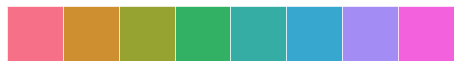

In [32]:
sns.palplot(sns.color_palette("husl",8))
sns.color_palette("husl",8)